# GRIP Internship - The Sparks Foundation

# Author: Harshit Singh

# Task 2 - Data Science and Business Analytics

# Prediction using Unsupervised Machine Learning

From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [1]:
# Importing Required Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [30]:
# Read the Dataset by pd.read_csv() method.
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
# Checking the shape (how many number of rows and columns are there)
data.shape

(150, 6)

In [22]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [23]:
# info method is used to tell how many null values are present in our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [17]:
data.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [18]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [19]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [20]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [31]:
# Equally Distributed Dataset is given
data.groupby(data['Species']).count()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,50,50,50,50
Iris-versicolor,50,50,50,50,50
Iris-virginica,50,50,50,50,50


In [32]:
data.Species.values

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [33]:
# corr() method gives the Correlation between different columns
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


# Data Visualization

Text(0, 0.5, 'Sepal Width')

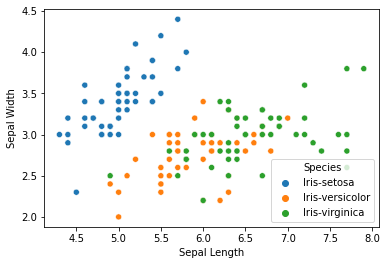

In [35]:
#visualising the Sepal data 
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',data=data, hue='Species')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

Text(0, 0.5, 'Petal Width')

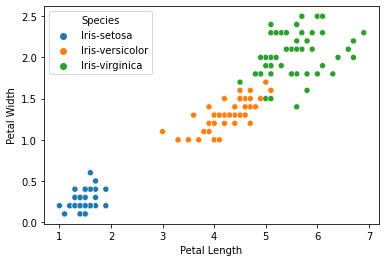

In [36]:
#visualising the petal data
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',data=data, hue='Species')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

Drawing Pair Plot and Heatmap for better Visualization

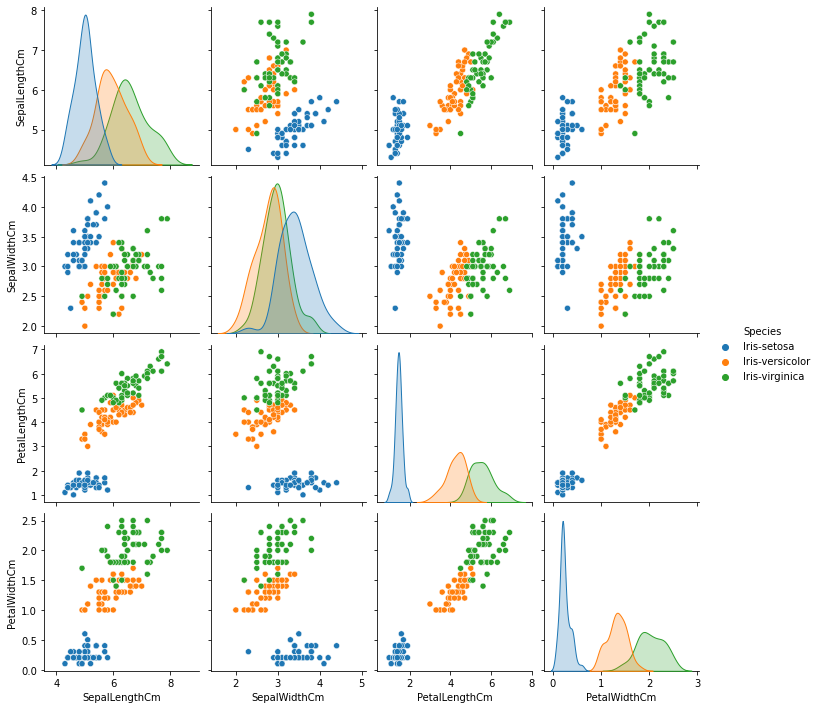

In [38]:
sns.pairplot(data, hue = 'Species', vars = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])

<AxesSubplot:>

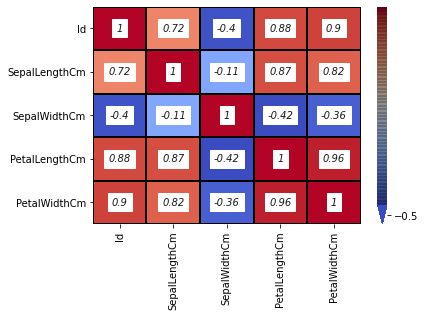

In [39]:
annot_kws = {"fontsize":10,
            "fontstyle":"italic",
            'color':'k',
            'alpha':0.9,
            'verticalalignment':'center',
            "backgroundcolor":'w'}
cbar_kws = {"orientation":"vertical", 
            "shrink":1,
            'extend':'min',
            'extendfrac':0.1,
            'ticks':np.arange(-0.5,1,7),
            "drawedges":True }
sns.heatmap(data.corr(),annot= True ,cmap = 'coolwarm', linewidths=1, linecolor='k',annot_kws= annot_kws,cbar_kws=cbar_kws)

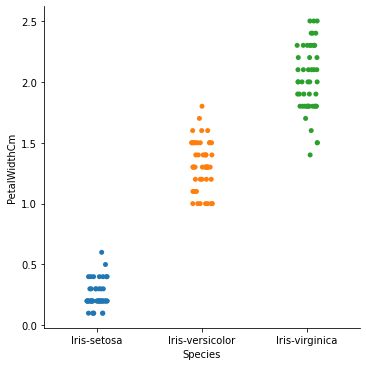

In [40]:
# Drawing catplot for the given categories of our Species column with any of the given columns
sns.catplot(x="Species", y="PetalWidthCm", hue=None, data=data)

# Finding the optimum number of Clusters

# Elbow Method

Before clustering the data using kmeans , we need to specify the number of clusters. In order to find the optimum number of clusters , there are various methods like Silhoutte Coefficient and Elbow Method . We will use the Elbow Method.

In [43]:
# SSE is the sum of the squared distance between centroid and each member of the cluster. Then plot a K against SSE graph.
x = data.iloc[:,[1,2,3,4]].values
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(x)
    sse.append(km.inertia_)


D:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


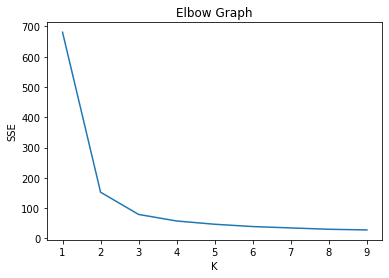

In [45]:
plt.plot(k_range,sse)
plt.title("Elbow Graph")
plt.xlabel("K")
plt.ylabel("SSE")
plt.show()

# Training our K- Means Clustering Model

In [46]:
km = KMeans(n_clusters=3, init='k-means++',n_init=10,max_iter=300)
km

KMeans(n_clusters=3)

In [48]:
clusters = km.fit_predict(x)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [49]:
# Merging Clusters Column to our Origional Dataset
data['clusters'] = clusters
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,clusters
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


In [50]:
# cluster_centers_ is used to calculating the centers
km.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

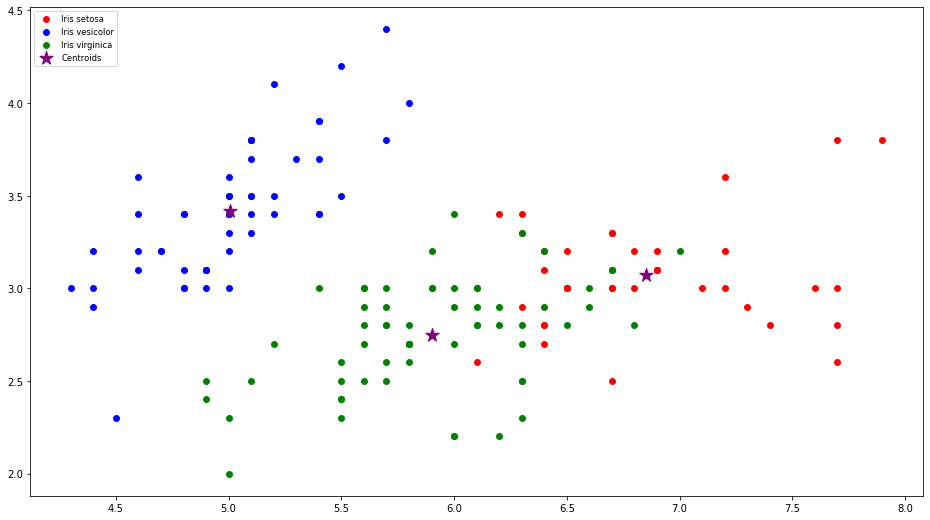

In [51]:
# Ploting our Clustering Dataset with Centroids to Visualize it better 
plt.figure(figsize = (16,9))
plt.scatter(x[clusters == 0, 0], x[clusters == 0, 1], s = 35, c = 'red', label = "Iris setosa")
plt.scatter(x[clusters == 1, 0], x[clusters == 1, 1], s = 35, c = 'blue', label = "Iris vesicolor")
plt.scatter(x[clusters == 2, 0], x[clusters == 2, 1], s = 35, c = 'green', label = "Iris virginica")

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'purple',marker = '*',s = 200, label = "Centroids")
plt.legend(fontsize = 'small',loc = 2)
plt.show()

In [52]:
species = ['Iris-setosa', 'Iris-vesicolor', 'Iris-virginica']
pred_species = []
for i in clusters:
    pred_species.append(species[i])

In [53]:
data['Pred_Species'] = pred_species
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,clusters,Pred_Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1,Iris-vesicolor
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1,Iris-vesicolor
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1,Iris-vesicolor
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1,Iris-vesicolor
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1,Iris-vesicolor


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pred_Species', ylabel='count'>

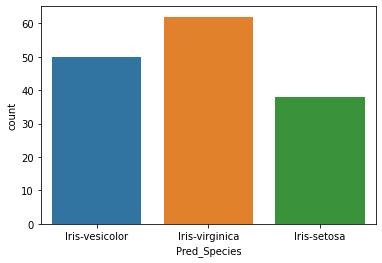

In [54]:
# CountPlot of our Predicted Species
sns.countplot(data['Pred_Species'])

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='count'>

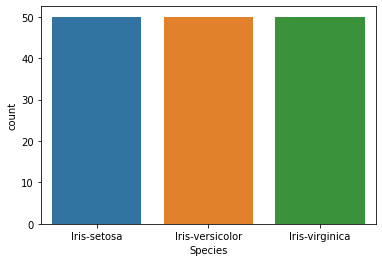

In [55]:
# CountPlot of our Origional Species
sns.countplot(data['Species'])

In [56]:
# Calculating our Model Accuracy Score
Score = km.score(x)
Score = -Score
print("Our Model Accuracy Score is {}".format(Score))

Our Model Accuracy Score is 78.94084142614601
